# US Visa Prediction Project

## 1) Problem statement.

* OFLC gives job certification applications for employers seeking to bring foreign workers into the United States and grants certifications. 
* As In last year the count of employees were huge so OFLC needs Machine learning models to shortlist visa applicants based on their previous data.

**In this project we are going to use the data given to build a Classification model:**

* This model is to check if Visa get approved or not based on the given dataset.
* This can be used to Recommend a suitable profile for the applicants for whom the visa should be certified or denied based on the certain criteria which influences the decision.

## 2) Data Collection.
* The Dataset is part of Office of Foreign Labor Certification (OFLC)
* The data consists of 25480 Rows and 12 Columns

https://www.kaggle.com/datasets/moro23/easyvisa-dataset

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [3]:
df = pd.read_csv(r"EasyVisa.csv")

In [4]:
df.head()

,case_id,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status
0,EZYV01,Asia,High School,N,N,14513,2007,West,592.2029,Hour,Y,Denied
1,EZYV02,Asia,Master's,Y,N,2412,2002,Northeast,83425.6500,Year,Y,Certified
2,EZYV03,Asia,Bachelor's,N,Y,44444,2008,West,122996.8600,Year,Y,Denied
3,EZYV04,Asia,Bachelor's,N,N,98,1897,West,83434.0300,Year,Y,Denied
4,EZYV05,Africa,Master's,Y,N,1082,2005,South,149907.3900,Year,Y,Certified


In [5]:
df.shape

(25480, 12)

In [7]:
df.describe()

,no_of_employees,yr_of_estab,prevailing_wage
count,25480.000000,25480.000000,25480.000000
mean,5667.043210,1979.409929,74455.814592
std,22877.928848,42.366929,52815.942327
min,-26.000000,1800.000000,2.136700
25%,1022.000000,1976.000000,34015.480000
50%,2109.000000,1997.000000,70308.210000
75%,3504.000000,2005.000000,107735.512500
max,602069.000000,2016.000000,319210.270000


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25480 entries, 0 to 25479
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   case_id                25480 non-null  object 
 1   continent              25480 non-null  object 
 2   education_of_employee  25480 non-null  object 
 3   has_job_experience     25480 non-null  object 
 4   requires_job_training  25480 non-null  object 
 5   no_of_employees        25480 non-null  int64  
 6   yr_of_estab            25480 non-null  int64  
 7   region_of_employment   25480 non-null  object 
 8   prevailing_wage        25480 non-null  float64
 9   unit_of_wage           25480 non-null  object 
 10  full_time_position     25480 non-null  object 
 11  case_status            25480 non-null  object 
dtypes: float64(1), int64(2), object(9)
memory usage: 2.3+ MB


## 3. EXPLORING DATA

In [9]:
numerical_features = [feature for feature in df.columns if df[feature].dtype!='O']
categorical_feature = [feature for feature in df.columns if df[feature].dtype=='O']

print("we have {} numerical fetures : {}".format(len(numerical_features),numerical_features))
print("we have {} categorical features : {}".format(len(categorical_feature),categorical_feature))

we have 3 numerical fetures : ['no_of_employees', 'yr_of_estab', 'prevailing_wage']
we have 9 categorical features : ['case_id', 'continent', 'education_of_employee', 'has_job_experience', 'requires_job_training', 'region_of_employment', 'unit_of_wage', 'full_time_position', 'case_status']


In [10]:
for col in categorical_feature:
    print(df[col].value_counts(normalize=True)*100)
    print("="*20)

case_id
EZYV01       0.003925
EZYV16995    0.003925
EZYV16993    0.003925
EZYV16992    0.003925
EZYV16991    0.003925
               ...   
EZYV8492     0.003925
EZYV8491     0.003925
EZYV8490     0.003925
EZYV8489     0.003925
EZYV25480    0.003925
Name: proportion, Length: 25480, dtype: float64
continent
Asia             66.173469
Europe           14.646782
North America    12.919937
South America     3.343799
Africa            2.162480
Oceania           0.753532
Name: proportion, dtype: float64
education_of_employee
Bachelor's     40.164835
Master's       37.810047
High School    13.422292
Doctorate       8.602826
Name: proportion, dtype: float64
has_job_experience
Y    58.092622
N    41.907378
Name: proportion, dtype: float64
requires_job_training
N    88.402669
Y    11.597331
Name: proportion, dtype: float64
region_of_employment
Northeast    28.237834
South        27.539246
West         25.847724
Midwest      16.903454
Island        1.471743
Name: proportion, dtype: float64
unit_o

**Insights**
 - `case_id` have unique vlaues for each column which can be dropped as it it of no importance
 - `continent` column is highly biased towards asia. 
 - `unit_of_wage` seems to be an important column as most of them are yearly contracts.

/var/folders/d1/t9bztyfn5qq_cf06_7mfd9lr0000gp/T/ipykernel_8432/1635932840.py:5: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(2,2,i+1)


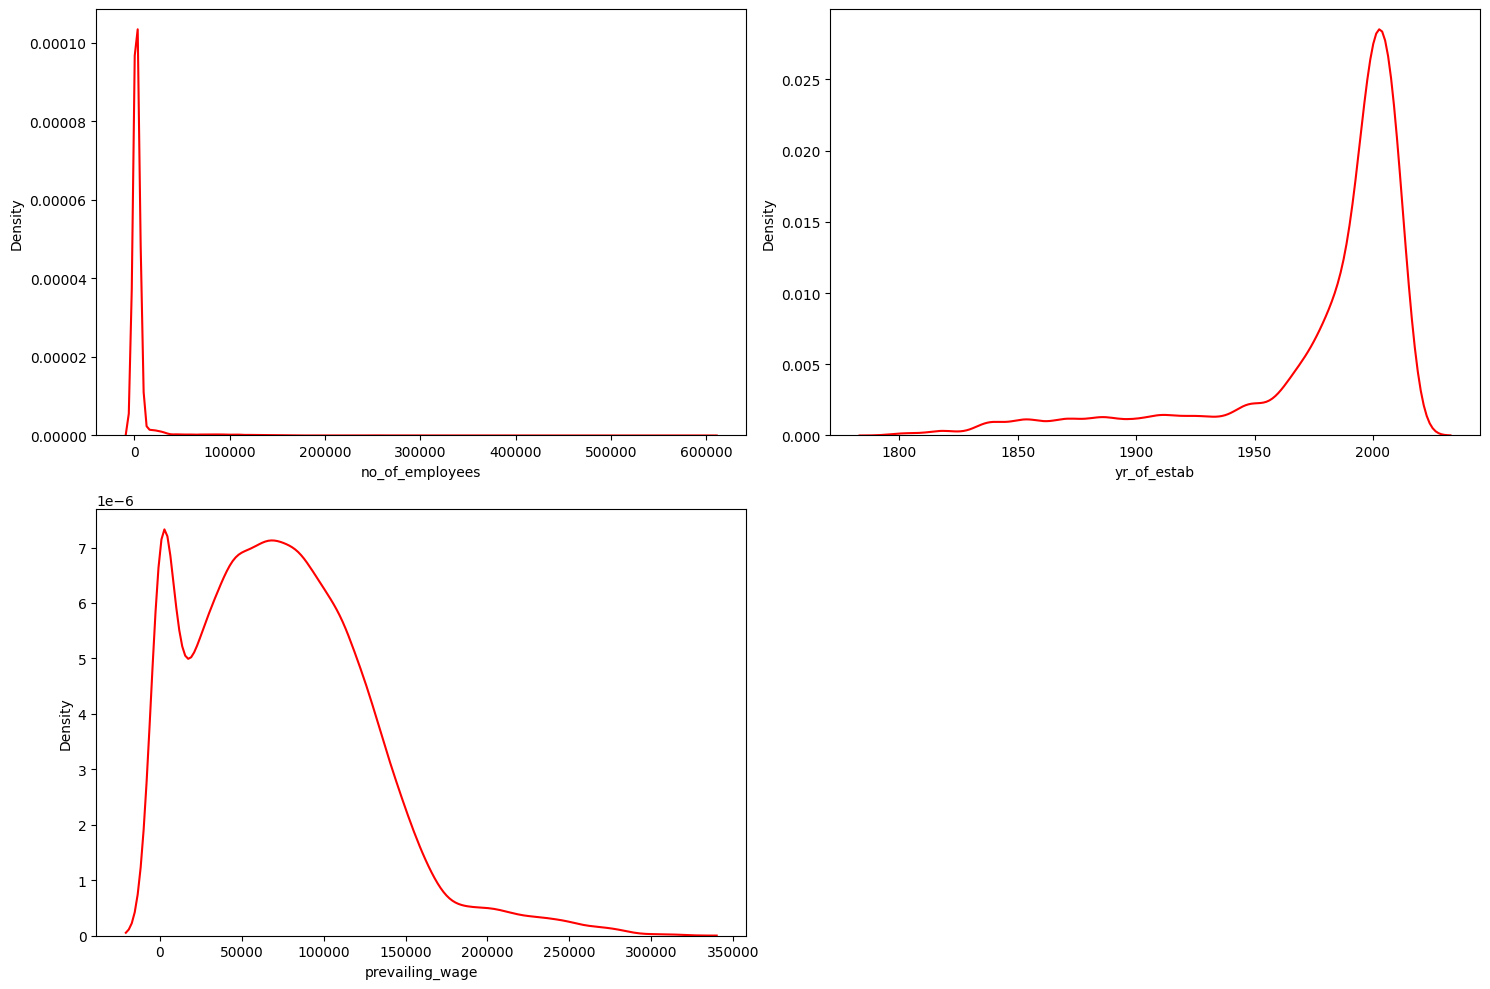

In [17]:
plt.figure(figsize=(15,10))
plt.title('Univariate Analysis of Numerical Features', fontsize=20, fontweight='bold')

for i in range(len(numerical_features)):
    plt.subplot(2,2,i+1)
    sns.kdeplot(x=df[numerical_features[i]],color='red')
    plt.xlabel(numerical_features[i])
    plt.tight_layout()
    

**Insights**
 - `no_of_employees` column looks more skewed but it may be because of outlies.
 - `yr_of_estab` is a discrete feature.
 - `privailing-wage` is a right-skewed distribution.

/var/folders/d1/t9bztyfn5qq_cf06_7mfd9lr0000gp/T/ipykernel_8432/2032426924.py:6: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(3,3,i+1)


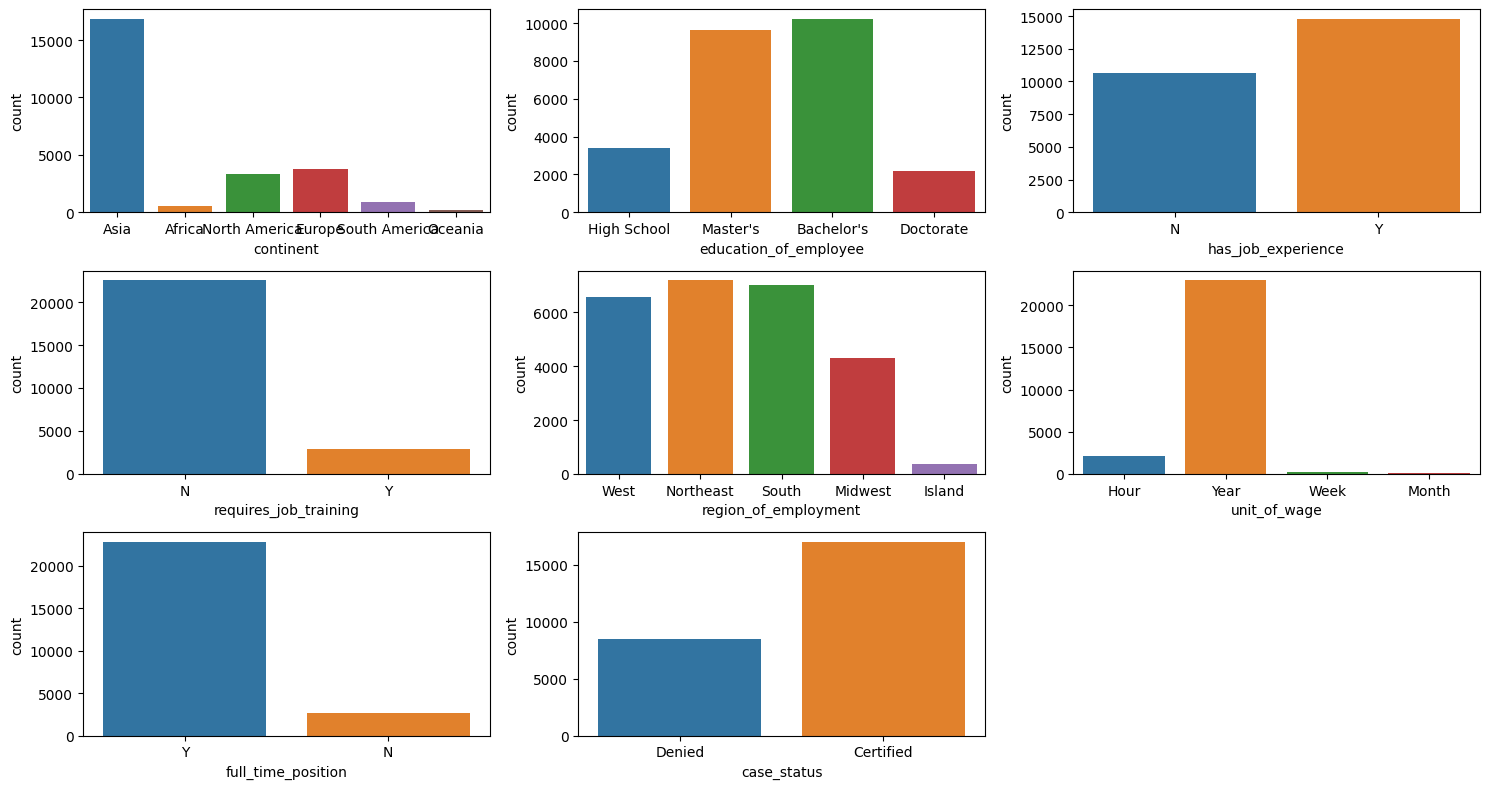

In [16]:
categorical_feature.remove('case_id')
plt.figure(figsize=(15,8))
plt.title('Univariate Analysis of Categorical Features', fontsize=20, fontweight='bold')

for i in range(len(categorical_feature)):
    plt.subplot(3,3,i+1)
    sns.countplot(x=df[categorical_feature[i]])
    plt.xlabel(categorical_feature[i])
    plt.tight_layout()

**Insights**
 - `requires_job_training`, `unit_of_wage`, `full_time_position` and `continents` coulmns have signle category dominating.
 - In rest of the columns are balanced.

### Check Multicollinearity for Categorical features

* **A chi-squared test (also chi-square or χ2 test) is a statistical hypothesis test that is valid to perform when the test statistic is chi-squared distributed under the null hypothesis, specifically Pearson's chi-squared test**

* **A chi-square statistic is one way to show a relationship between two categorical variables.**

* **Here we test correlation of Categorical columns with Target column i.e case_status**

In [27]:
from scipy.stats import chi2_contingency
chi2_test = []
for feature in categorical_feature:
    if chi2_contingency(pd.crosstab(df['case_status'], df[feature]))[1] < 0.05:
        chi2_test.append('Reject Null Hypothesis')
    else:
        chi2_test.append('Fail to Reject Null Hypothesis')
result = pd.DataFrame(data=[categorical_feature, chi2_test]).T
result.columns = ['Column', 'Hypothesis Result']
result

,Column,Hypothesis Result
0,continent,Reject Null Hypothesis
1,education_of_employee,Reject Null Hypothesis
2,has_job_experience,Reject Null Hypothesis
3,requires_job_training,Fail to Reject Null Hypothesis
4,region_of_employment,Reject Null Hypothesis
5,unit_of_wage,Reject Null Hypothesis
6,full_time_position,Reject Null Hypothesis
7,case_status,Reject Null Hypothesis


**Report** 
* Here `requires_job_training` fails to Rejects Null Hypothesis which means it doesn't correlate with target column.

In [28]:
continuous_features = [feature for feature in numerical_features if len(df[feature].unique())>25]
continuous_features

['no_of_employees', 'yr_of_estab', 'prevailing_wage']

/var/folders/d1/t9bztyfn5qq_cf06_7mfd9lr0000gp/T/ipykernel_8432/1414413831.py:4: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(3,3,i+1)


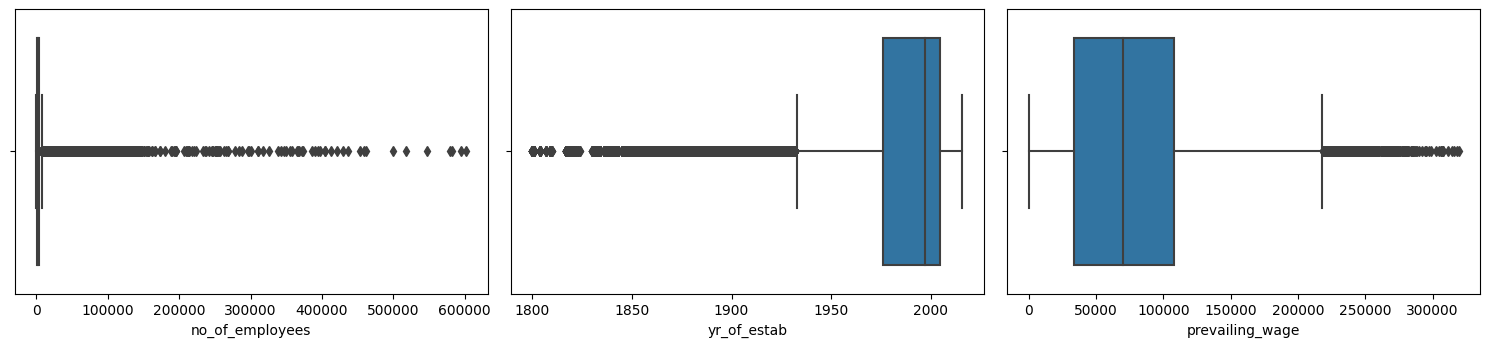

In [25]:
plt.figure(figsize=(15,10))
plt.title("outliers")
for i in range(len(numerical_features)):
    plt.subplot(3,3,i+1)
    sns.boxplot(x=df[numerical_features[i]])
    plt.xlabel(numerical_features[i])
    plt.tight_layout()

## Initial Analysis Report

* **No of Employees has many outliers which can be Handled in Feature Engineering and `no_of_employees` is Right Skewed.**
* **`yr_of_estab` is left skewed and some outliers below the lower bound of Box plot.**
* **`prevailing_wage` is right skewed with outliers above upper bound of box plot.**
* **There are No missing values in the dataset.**
* **The `case_id` column can be deleted because each row has unique values.**
* **The `case_status` column is the target to predict.**
* **In the Categorical column, features can be made Binary numerical in feature Encoding**

### Does applicant Continent has any impact on Visa status ?

In [32]:
#group data by continent and their count of case_status
df.groupby('continent')['case_status'].value_counts(normalize=True).to_frame()*100

proportion
continent     case_status            
Africa        Certified     72.050817
              Denied        27.949183
Asia          Certified     65.310480
              Denied        34.689520
Europe        Certified     79.233655
              Denied        20.766345
North America Certified     61.877278
              Denied        38.122722
Oceania       Certified     63.541667
              Denied        36.458333
South America Certified     57.863850
              Denied        42.136150

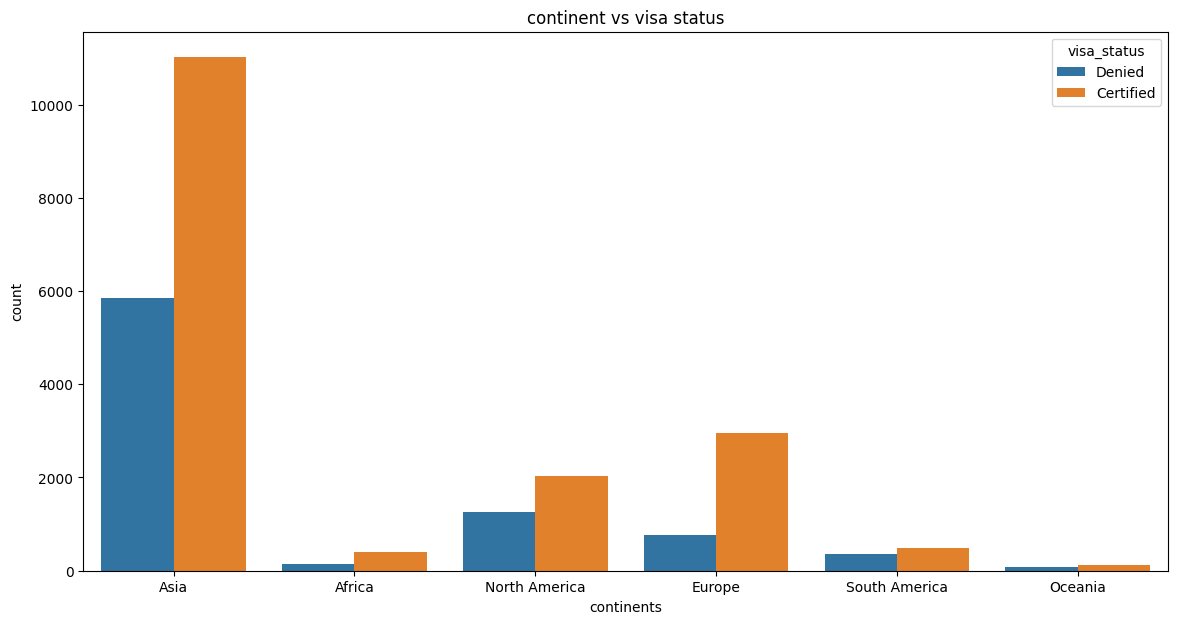

In [41]:
plt.figure(figsize=(14,7))
sns.countplot(x='continent',hue='case_status',data=df)
plt.title("continent vs visa status")
plt.ylabel("count")
plt.xlabel("continents")
plt.legend(title="visa_status")
plt.show()

### Does applicant education has any impact on Visa status ?

In [38]:
#group data by Education and their count of case_status
df.groupby('education_of_employee')['case_status'].value_counts(normalize=True).to_frame()*100

proportion
education_of_employee case_status            
Bachelor's            Certified     62.214188
                      Denied        37.785812
Doctorate             Certified     87.226277
                      Denied        12.773723
High School           Denied        65.964912
                      Certified     34.035088
Master's              Certified     78.627777
                      Denied        21.372223

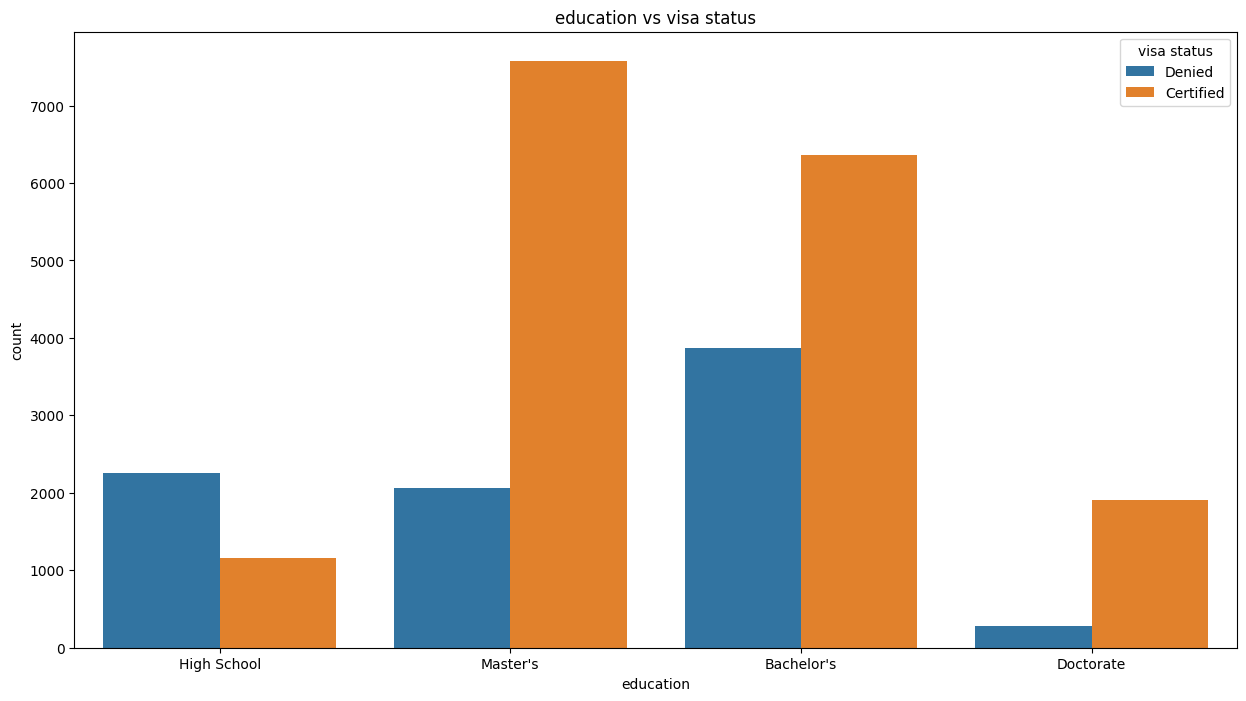

In [42]:
plt.figure(figsize=(15,8))
plt.title("education vs visa status")
sns.countplot(x='education_of_employee',hue='case_status',data=df)
plt.ylabel("count")
plt.xlabel("education")
plt.legend(title='visa status')
plt.show()

###  Does applicant's previous work experience has any impact on Visa status ?

In [43]:
#group data by has_job_experience and count case_status
df.groupby('has_job_experience')['case_status'].value_counts(normalize=True).to_frame()*100

proportion
has_job_experience case_status            
N                  Certified     56.134108
                   Denied        43.865892
Y                  Certified     74.476422
                   Denied        25.523578

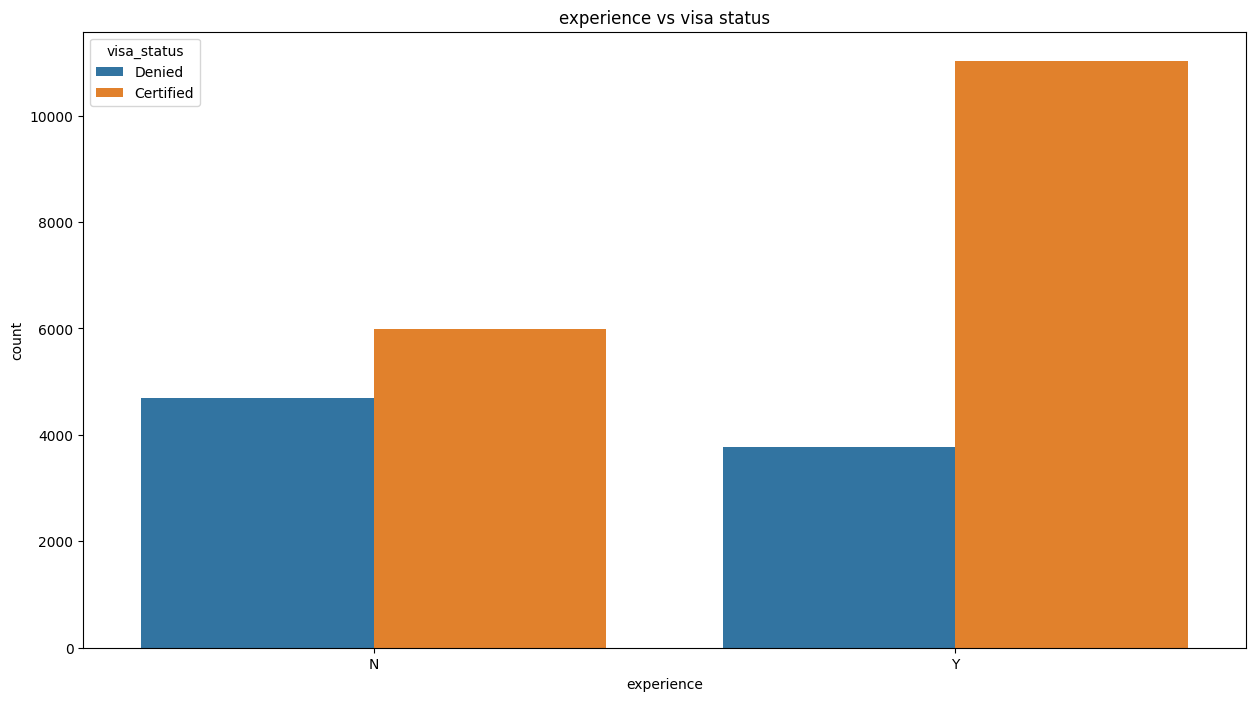

In [44]:
plt.figure(figsize=(15,8))
plt.title("experience vs visa status")
sns.countplot(x='has_job_experience',hue='case_status',data=df)
plt.ylabel("count")
plt.xlabel("experience")
plt.legend(title='visa_status')
plt.show()

###  If the Employee requires job training, does it make any impact on visa status?

In [45]:
#group data by requires_job_training and count case_status
df.groupby('requires_job_training')['case_status'].value_counts(normalize=True).to_frame()*100

proportion
requires_job_training case_status            
N                     Certified     66.645949
                      Denied        33.354051
Y                     Certified     67.884941
                      Denied        32.115059

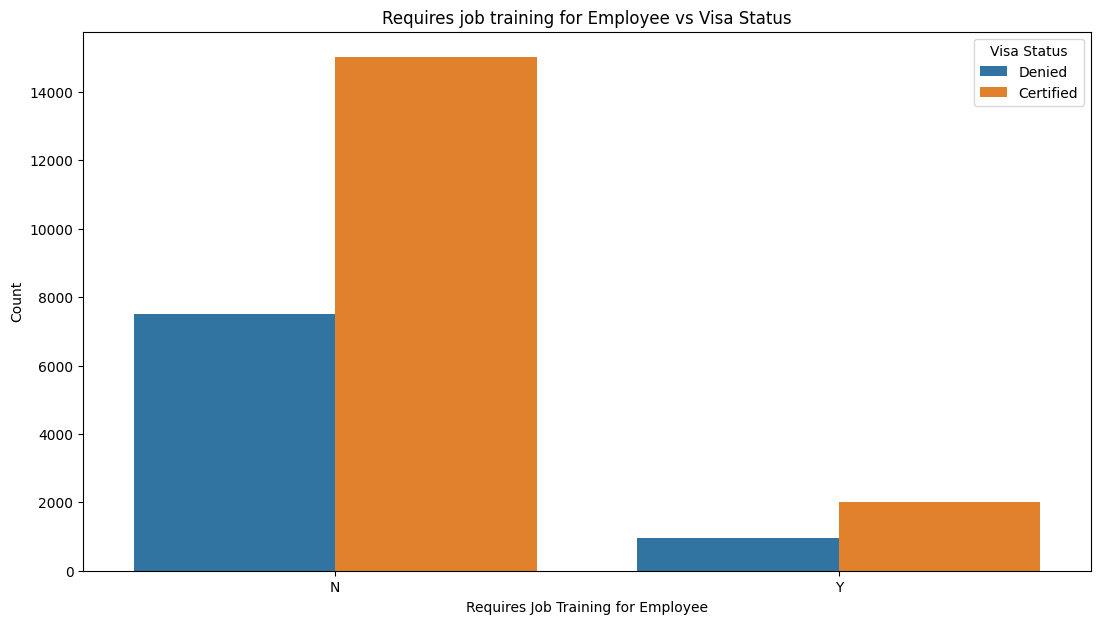

In [46]:
plt.subplots(figsize=(13,7))
sns.countplot(x="requires_job_training",hue="case_status", data=df)
plt.title("Requires job training for Employee vs Visa Status", )
plt.ylabel("Count")
plt.xlabel("Requires Job Training for Employee")
plt.legend(title="Visa Status")
plt.show()

###  Wages and its impact on Visa status

In [47]:
#group data by unit_of_wage and count the case_status
df.groupby('unit_of_wage')['case_status'].value_counts(normalize=True)

unit_of_wage  case_status
Hour          Denied         0.653686
              Certified      0.346314
Month         Certified      0.617978
              Denied         0.382022
Week          Certified      0.621324
              Denied         0.378676
Year          Certified      0.698850
              Denied         0.301150
Name: proportion, dtype: float64

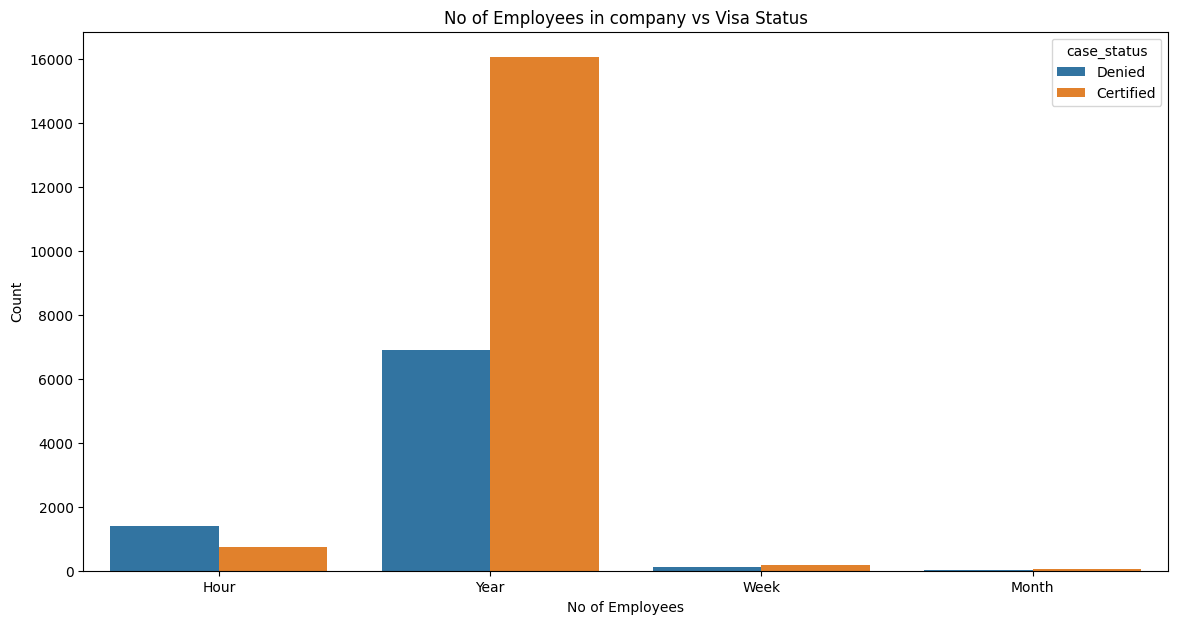

In [48]:
plt.subplots(figsize=(14,7))
sns.countplot(x="unit_of_wage",hue="case_status", data=df)
plt.title("No of Employees in company vs Visa Status")
plt.xlabel("No of Employees")
plt.ylabel("Count")
plt.show()

###  Does Region of employment has impact on Visa status ?

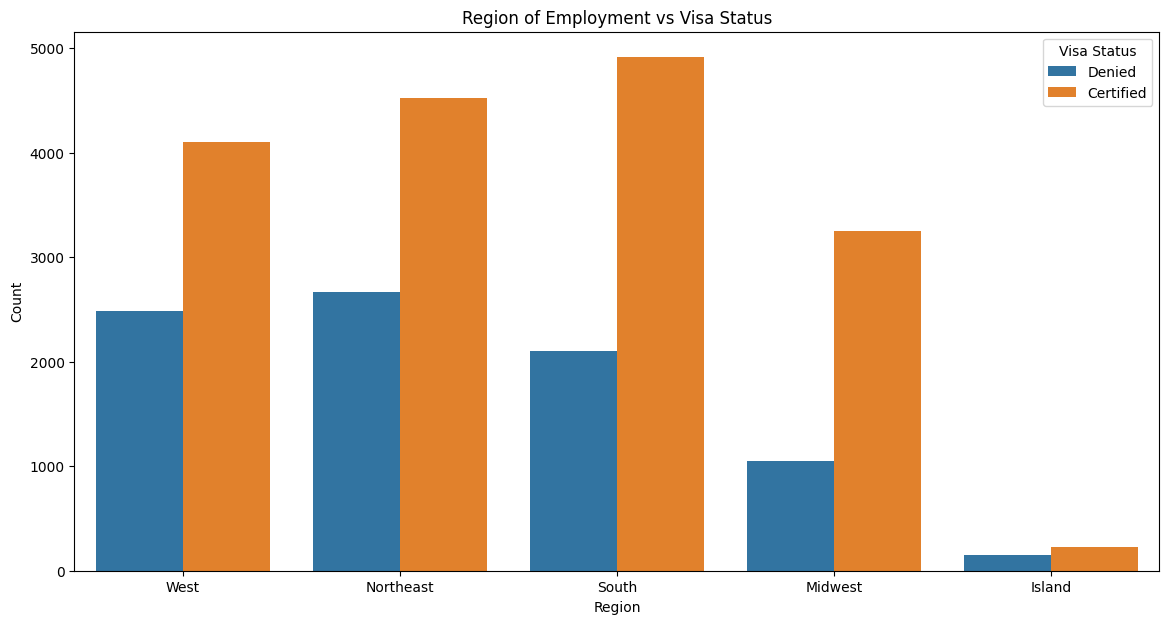

In [50]:
plt.subplots(figsize=(14,7))
sns.countplot(x="region_of_employment",hue="case_status", data=df)
plt.title("Region of Employment vs Visa Status")
plt.xlabel("Region")
plt.ylabel("Count")
plt.legend(title="Visa Status")
plt.show()

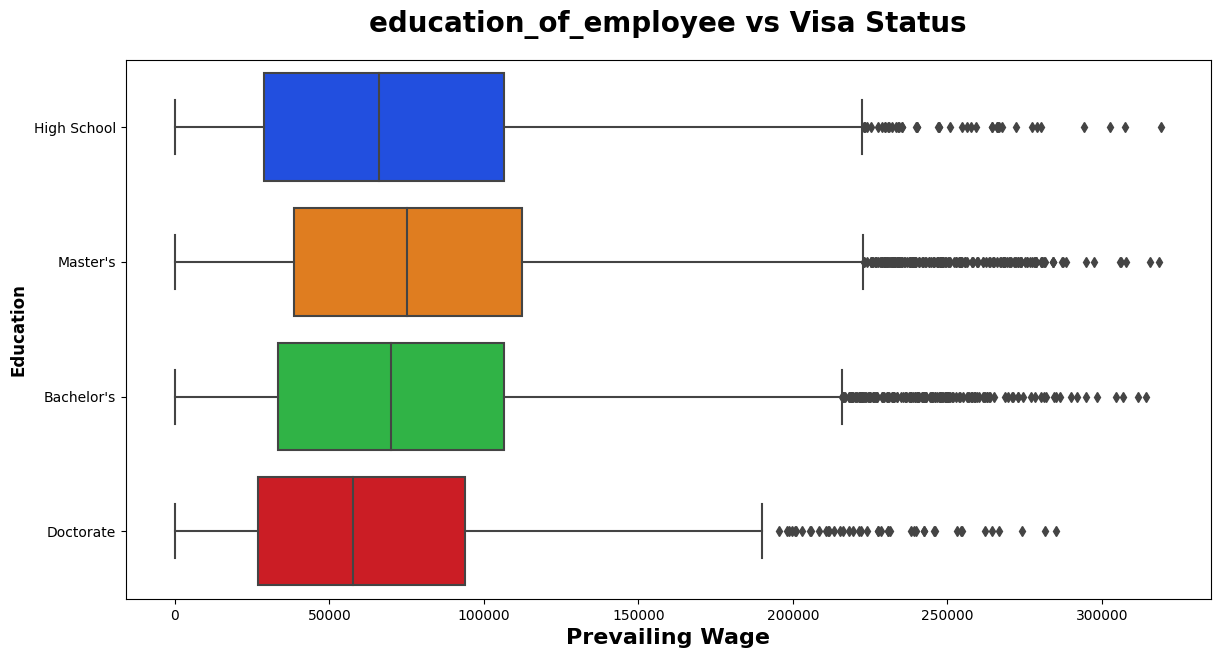

In [51]:
plt.subplots(figsize=(14,7))
sns.boxplot(y="education_of_employee",x = "prevailing_wage", data=df,palette='bright')
plt.title("education_of_employee vs Visa Status", weight="bold",fontsize=20, pad=20)
plt.xlabel("Prevailing Wage", weight="bold", fontsize=16)
plt.ylabel("Education", weight="bold", fontsize=12)
plt.show()

### Final Report 
* `case_id` column can be dropped as it is an ID.
* `requires_job_training` column can be dropped as it doesn't have much impact on target variable, Proved in visualization and chi2 test.
* `no_of_employees`, `prevailing_wage` columns have outllier which should be handled.
* `continent` columns has few unique values with very less count, which can be made as **others**
* Target column `case_status` is imbalanced can be handled before model building.